,Revenue ($M),Net Income ($M),Operating Income ($M),EBITDA ($M),Interest Income ($M)
2021,"67,418.00","1,995.00","3,659.00","9,078.00",140.00
2022,"82,722.00","3,145.00","6,770.00","11,997.00",90.00
2023,"88,898.00","2,354.00","8,992.00","12,111.00",424.00
2024,"91,361.00","4,972.00","11,914.00","14,629.00",406.00


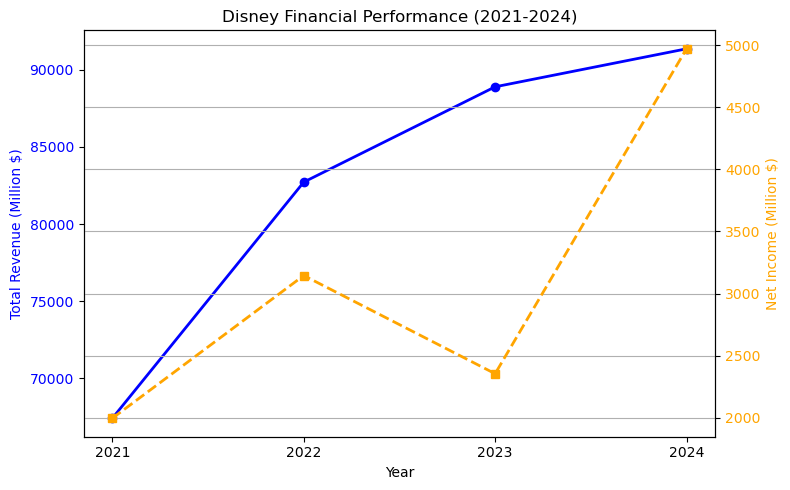

In [32]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Retrieve Disney (DIS) stock data
dis = yf.Ticker("DIS")

# Fetch Disney's financial data (Income Statement)
annual_financials = dis.financials.T  

# Convert index to DatetimeIndex and keep only years (YYYY format)
annual_financials.index = pd.to_datetime(annual_financials.index).year
annual_financials = annual_financials.sort_index()

# Define time range: 2021-2024
start_year = 2021
end_year = 2024
financials_filtered = annual_financials.loc[start_year:end_year]

# Select key financial columns for better visualization
columns_to_display = [
    "Total Revenue",
    "Net Income",
    "Operating Income",
    "EBITDA",
    "Interest Income",
]

# Filter only relevant columns (if they exist in the dataset)
financials_display = financials_filtered[columns_to_display].copy()
financials_display = financials_display / 1e6  # Convert to million dollars ($M)
financials_display = financials_display.round(2)  # Round values

# Rename columns for better readability
financials_display.rename(columns={
    "Total Revenue": "Revenue ($M)",
    "Net Income": "Net Income ($M)",
    "Operating Income": "Operating Income ($M)",
    "EBITDA": "EBITDA ($M)",
    "Interest Income": "Interest Income ($M)"
}, inplace=True)

# Apply styling for better Jupyter Notebook visualization
styled_df = financials_display.style.set_table_styles(
    [{"selector": "th", "props": [("font-size", "14px"), ("text-align", "center")]}]
).set_properties(**{"text-align": "center"}).format("{:,.2f}")

# Display formatted table
display(styled_df)

# ==============================
# 📊 Visualization: Line Chart
# ==============================
if "Revenue ($M)" in financials_display.columns and "Net Income ($M)" in financials_display.columns:
    years = financials_display.index
    revenue = financials_display["Revenue ($M)"]
    net_income = financials_display["Net Income ($M)"]

    fig, ax1 = plt.subplots(figsize=(8, 5))

    # Primary Y-axis for Revenue
    ax1.plot(years, revenue, marker='o', label="Total Revenue ($M)", color='blue', linewidth=2)
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Total Revenue (Million $)", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Ensure X-axis only displays whole years
    ax1.set_xticks(years)

    # Secondary Y-axis for Net Income
    ax2 = ax1.twinx()
    ax2.plot(years, net_income, marker='s', linestyle="dashed", label="Net Income ($M)", color='orange', linewidth=2)
    ax2.set_ylabel("Net Income (Million $)", color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    # Title and Grid
    plt.title("Disney Financial Performance (2021-2024)")
    fig.tight_layout()
    plt.grid()
    plt.show()
else:
    print("Please check Yahoo Finance field names. Adjust the code if necessary.")